<a href="https://colab.research.google.com/github/Aym98/pyro-risks/blob/master/antennes_radio/radioData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import numpy as np
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns


# Info Importantes :
    - % de sites par catégorie d'infra
    - proprio des des infras
    - repartitions des opérateur
    - Faire classement par département ?
    - d'autres info à voir

In [ ]:
"""data_files = os.listdir("data")
print(data_files)"""

['Antennes_Emetteurs_Bandes_Cartoradio.csv', 'Mesures_globales_Cartoradio.csv', 'Mesures_par_service_Cartoradio.csv', 'Sites_Cartoradio.csv', 'Stations_Dates_accords_ANFR_Cartoradio.csv']


In [2]:
data_files = ['Antennes_Emetteurs_Bandes_Cartoradio.csv', 'Mesures_globales_Cartoradio.csv', 'Mesures_par_service_Cartoradio.csv', 'Sites_Cartoradio.csv', 'Stations_Dates_accords_ANFR_Cartoradio.csv']

# Définitions et clarfications :


*   ***Site*** : Infrastucture sur laquelle sont installées les antennes. Les sites sont représentés dans le dataframe du même nom.
*   ***Station*** : Ensemble d'équipements radio appartenant à un même parti
*  ***Dataframe antennes*** : Dataset où une ligne représente une bande de fréquence d'antenne





In [4]:
#antennes = pd.read_csv(os.path.join("data", data_files[0]), sep =';', encoding = "latin-1")
antennes = pd.read_csv(data_files[0], sep =';', encoding = "latin-1")
antennes.head()

,Numéro de support,Numéro Cartoradio,Numéro de Station,Date de mise en service,Exploitant,Type d'antenne,Numéro d'antenne,Dimension de l'antenne,Directivité,Azimut,Hauteur / sol,Type service,Système,Début,Fin,Unité
0,4578,214455,90130162,non disponible,TDF,Logarithmique/Log périodique,1158,0.2,Directif,110.0,40.0,RADIO,FM,87.5,108.0,MHz
1,4580,214456,90130163,non disponible,TDF,Logarithmique/Log périodique,1159,0.2,Directif,175.0,40.0,RADIO,FM,87.5,108.0,MHz
2,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,1725813,1.2,Directif,64.1,24.0,FH,FH,10.7,11.7,GHz
3,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,2030621,0.9,Directif,234.1,19.0,FH,FH,12.8,13.2,GHz
4,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,524854,1.2,Directif,159.7,21.0,FH,FH,6425.0,6700.0,MHz


# Questions :
    Bandes de fréquences sont elles intéressantes ?

In [5]:
# site == infratruscture
#sites = pd.read_csv(os.path.join("data", data_files[3]), sep =';', encoding = "latin-1")
sites = pd.read_csv(data_files[3], sep =';', encoding = "latin-1")
sites.head()

,Numéro du support,Longitude,Latitude,Position,Insee,Lieu dit,Adresse,Code postal,Commune,Nature du support,Hauteur en m,Propriétaire
0,4578,1.636944,43.234444,"43°14'4.000""N 1°38'13.000""E",9185,ECH DE MAZÈRES-SAV,ECH DE MAZERES SAVERDUN,9270,MAZERES,Pylône autostable,40.0,TDF
1,4580,1.615000,43.152500,"43°9'9.000""N 1°36'54.000""E",9225,PÉAGE,PEAGE,9100,PAMIERS,Pylône autostable,40.0,TDF
2,4844,2.273611,43.358333,"43°21'30.000""N 2°16'25.000""E",11115,CAZELLES,RD.118,11390,CUXAC CABARDES,Pylône autostable,25.0,TOTEM
3,4874,1.903333,43.193333,"43°11'36.000""N 1°54'12.000""E",11159,NaN,ROUTE DE CASTELNAUDARY,11270,GAJA LA SELVE,Pylône autostable,12.0,TOTEM
4,4882,2.216667,43.045833,"43°2'45.000""N 2°13'0.000""E",11206,LES ENCANTADOS,NaN,11300,LIMOUX,Pylône autostable,10.0,ORANGE Services Fixes


In [6]:
type_infra = sites["Nature du support"]
type_infra = pd.get_dummies(type_infra, drop_first= True, dtype= int)


In [7]:
antennes = antennes.rename(columns={"Numéro de support" : "Numéro du support"})

In [8]:
sites = pd.concat([sites, type_infra], axis = 1)

In [9]:
df = pd.merge(antennes, sites, on = "Numéro du support", how = "outer")
df.head()

,Numéro du support,Numéro Cartoradio,Numéro de Station,Date de mise en service,Exploitant,Type d'antenne,Numéro d'antenne,Dimension de l'antenne,Directivité,Azimut,...,Pylône autostable,Pylône haubané,Pylône tubulaire,Silo,Support non décrit,Sémaphore,Tour de contrôle,Tour hertzienne,Tunnel,pylône arbre
0,4578,214455,90130162,non disponible,TDF,Logarithmique/Log périodique,1158,0.2,Directif,110.0,...,1,0,0,0,0,0,0,0,0,0
1,4580,214456,90130163,non disponible,TDF,Logarithmique/Log périodique,1159,0.2,Directif,175.0,...,1,0,0,0,0,0,0,0,0,0
2,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,1725813,1.2,Directif,64.1,...,1,0,0,0,0,0,0,0,0,0
3,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,2030621,0.9,Directif,234.1,...,1,0,0,0,0,0,0,0,0,0
4,4844,7655,110220011,non disponible,ORANGE service fixe,Antenne parabolique,524854,1.2,Directif,159.7,...,1,0,0,0,0,0,0,0,0,0


# Visualisation de données préliminaire

interactive(children=(Dropdown(description='Selectionnez une commune', options=('MAZERES', 'PAMIERS', 'CUXAC C…

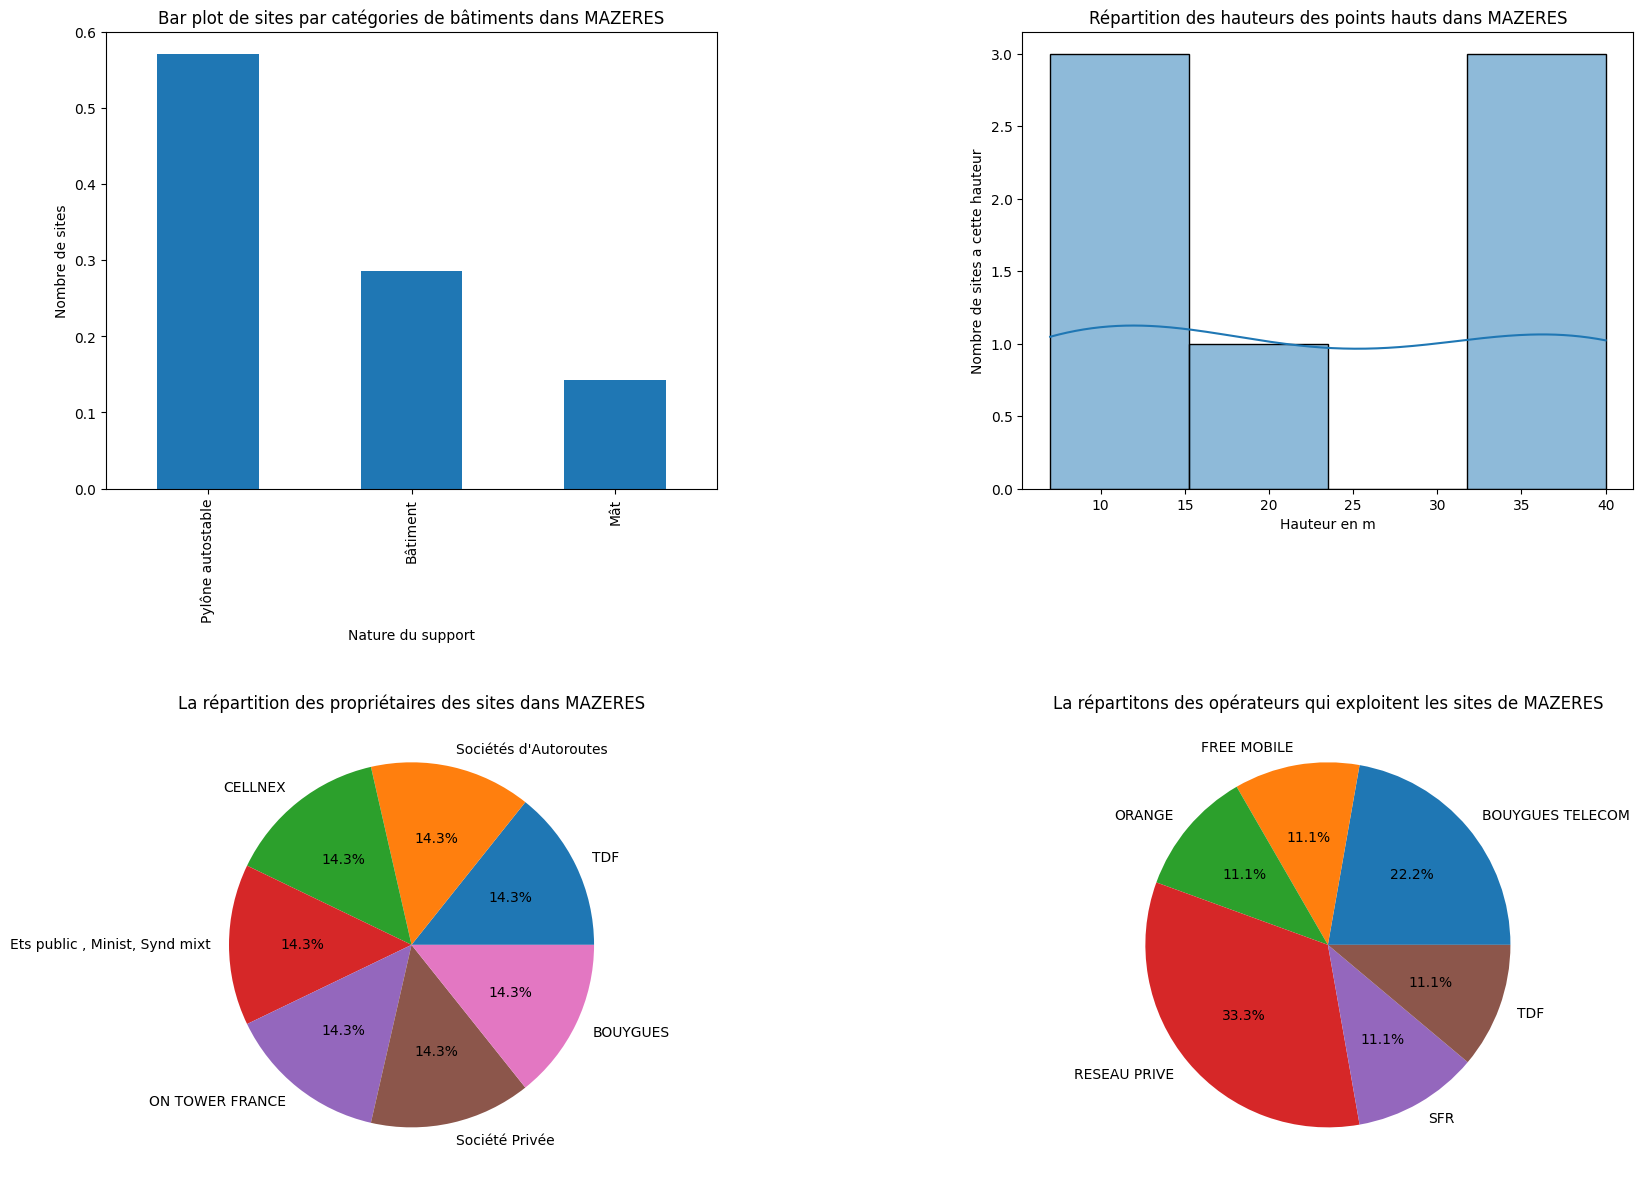

In [10]:
commune_select = widgets.Dropdown(
    options=list(sites["Commune"].unique()) + ["TOUTES"],
    value="MAZERES",
    description="Selectionnez une commune",
)
def update_plot(commune_select):
    if commune_select == "TOUTES":
        filtred_df = df
        filtred_sites = sites
    else:
        filtred_sites = sites[sites["Commune"] == commune_select]
        filtred_df = df[df["Commune"] == commune_select]
    hauteur = filtred_sites["Hauteur en m"].values
    proprio_series = filtred_sites["Propriétaire"].value_counts()
    operator_series = filtred_df.groupby("Exploitant")["Numéro du support"].nunique()
    data_series = operator_series
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # % de sites par catégories de bâtiments
    filtred_sites["Nature du support"].value_counts(sort = False, normalize=True).plot.bar(ax = axs[0][0])
    axs[0][0].set_title(f"Bar plot de sites par catégories de bâtiments dans {commune_select}")
    axs[0][0].set_ylabel("Nombre de sites")
    # Répartition des hauteurs
    sns.histplot(data = hauteur, kde = True, ax=axs[0][1])
    axs[0][1].set_title(f"Répartition des hauteurs des points hauts dans {commune_select}")
    axs[0][1].set_xlabel("Hauteur en m")
    axs[0][1].set_ylabel("Nombre de sites a cette hauteur")
    # Répartitions des propriétaires de sites
    axs[1][0].pie(proprio_series.values, labels = proprio_series.index, autopct='%1.1f%%')
    axs[1][0].set_title(f"La répartition des propriétaires des sites dans {commune_select}")
    # Répartitions des opérateurs qui exploitent les sites
    axs[1][1].pie(operator_series.values, labels = operator_series.index, autopct= '%1.1f%%')
    axs[1][1].set_title(f"La répartitons des opérateurs qui exploitent les sites de {commune_select}")
widgets.interactive(update_plot, commune_select = commune_select)

# Autres données disponibles:
*  ***Types de service*** : 4G, 5G, LTE
* ***Mesures*** : Force du champ éléctrique, azimut d'antennes, portée d'émission (je pense l'avoir vérifiée mais à vérifier )
* Données datagouv.fr : A éxplorer .